In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import simpson


In [3]:
def trapezoid_integration(power_values, dx=1):
    """
    Apply the trapezoidal rule to compute total energy (Wh).
    dx is 1 hour by default.
    """
    return np.trapezoid(power_values, dx=dx)

def simpson_integration(power_values, dx=1):
    """
    Apply Simpson’s rule to compute total energy (Wh).
    Requires an even number of intervals (i.e., odd number of samples).
    """
    n = len(power_values)
    if n % 2 == 0:
        power_values = power_values[:-1]  # drop last value to make it odd
    return simpson(power_values, dx=dx)

In [8]:
cities = ["Seattle", "NYC", "Miami", "LV", "LA", "Denver"]
results = []
for city in cities:
    df = pd.read_csv(f"/content/drive/MyDrive/2025 Homework/spring/Math 151A/datasets/{city}_with_power.csv")

    # Combine date and time into a single datetime column (optional, but good practice)
    df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
    df = df.sort_values('Timestamp')  # Ensure correct chronological order

    power = df['PowerOutput_W'].values

    energy_trap = trapezoid_integration(power) / 1000  # Wh → kWh
    energy_simp = simpson_integration(power) / 1000    # Wh → kWh

    results.append({
        "City": city,
        "Yearly Energy (kWh) - Trapezoid": round(energy_trap, 2),
        "Yearly Energy (kWh) - Simpson": round(energy_simp, 2)
    })

In [9]:
# print and export as CSV
energy_df = pd.DataFrame(results)
print(energy_df)
energy_df.to_csv("yearly_energy_output.csv", index=True)

      City  Yearly Energy (kWh) - Trapezoid  Yearly Energy (kWh) - Simpson
0  Seattle                           474.60                         474.69
1      NYC                           503.44                         502.06
2    Miami                           635.02                         635.07
3       LV                           681.10                         681.60
4       LA                           629.35                         628.98
5   Denver                           607.23                         606.84


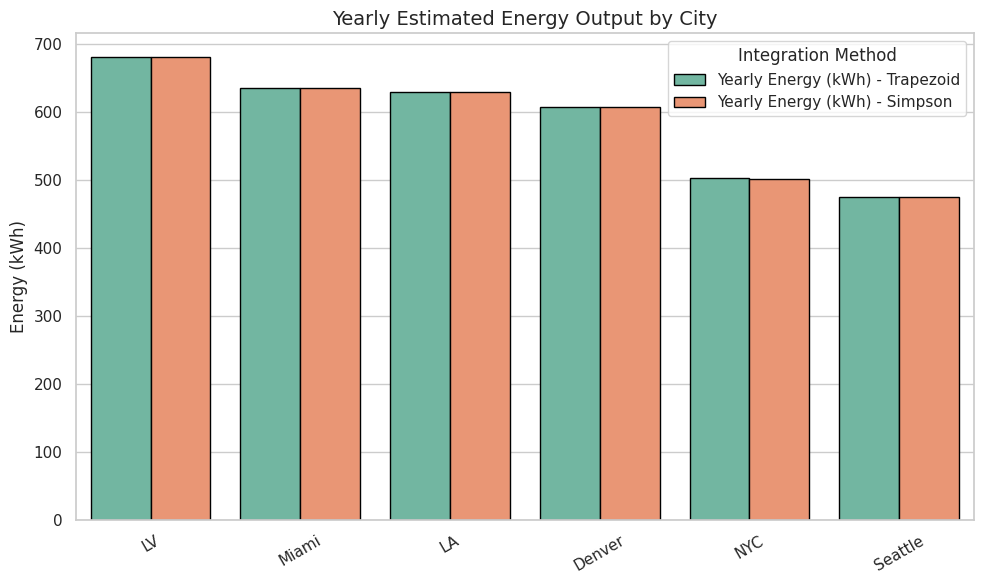

In [ ]:
# Visualizations - bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sort cities by Simpson output (descending)
city_order = energy_df.sort_values("Yearly Energy (kWh) - Simpson", ascending=False)["City"]

# Step 2: Melt the DataFrame for plotting
df_melted = energy_df.melt(id_vars='City',
                           var_name='Integration Method',
                           value_name='Energy (kWh)')

# Step 3: Plot with ordered cities
sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_melted,
                 x='City',
                 y='Energy (kWh)',
                 hue='Integration Method',
                 dodge=0.4,
                 order=city_order,
                 edgecolor='black')

# Beautify
plt.title('Yearly Estimated Energy Output by City', fontsize=14)
plt.xlabel('')
plt.ylabel('Energy (kWh)', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Integration Method')
plt.tight_layout()
plt.show()


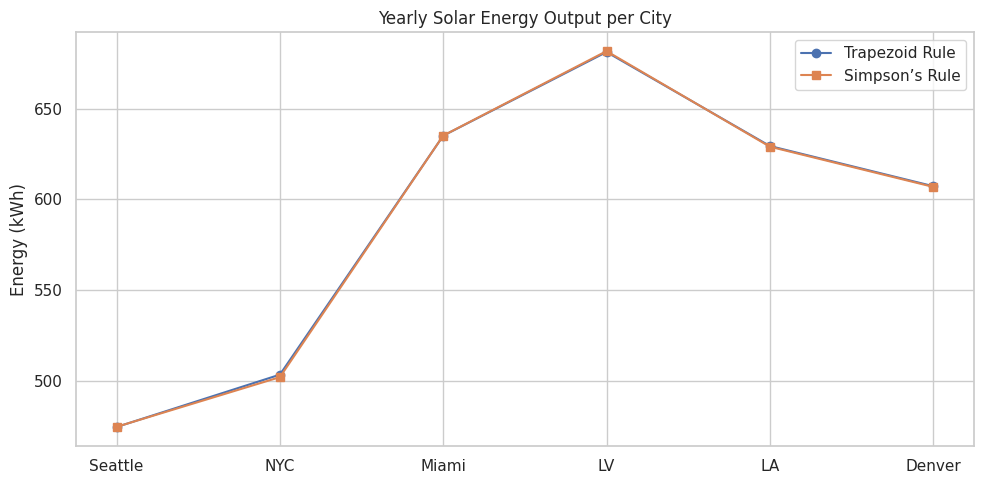

In [ ]:
plt.figure(figsize=(10, 5))
cities = energy_df['City']
plt.plot(cities, energy_df['Yearly Energy (kWh) - Trapezoid'], marker='o', label='Trapezoid Rule')
plt.plot(cities, energy_df['Yearly Energy (kWh) - Simpson'], marker='s', label='Simpson’s Rule')

plt.title('Yearly Solar Energy Output per City')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!apt-get install -y libproj-dev proj-data proj-bin libgeos-dev
!pip install Cartopy


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (9.3.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.3.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 205 kB of archives.
After this operation, 521 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.3.1-1~jammy0 [205 kB]
Fetched 205 kB in 1s (187 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# after processing
energy_df = pd.read_csv("/content/drive/MyDrive/2025 Homework/spring/Math 151A/datasets/yearly_energy_output.csv")

In [ ]:
# Map
#Add lat/lon coordinates for each city
city_coords = {
    "Seattle": {"lat": 47.6062, "lon": -122.3321},
    "NYC": {"lat": 40.7128, "lon": -74.0060},
    "Miami": {"lat": 25.7617, "lon": -80.1918},
    "LV": {"lat": 36.1699, "lon": -115.1398},
    "LA": {"lat": 34.0522, "lon": -118.2437},
    "Denver": {"lat": 39.7392, "lon": -104.9903},
}

# Add to DataFrame
energy_df['lat'] = energy_df['City'].map(lambda x: city_coords[x]['lat'])
energy_df['lon'] = energy_df['City'].map(lambda x: city_coords[x]['lon'])

# Use Simpson's rule as the primary marker size
energy_df['Size'] = energy_df['Yearly Energy (kWh) - Simpson']


In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.7 MB/s eta 0:00:00


<ipython-input-16-a0949dd6293e>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')  # Blue to red gradient


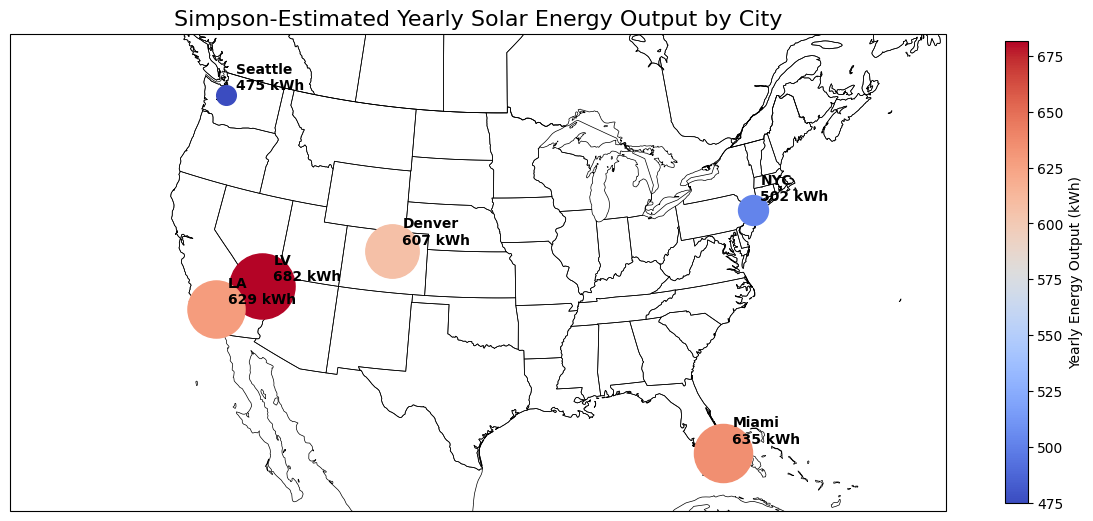

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Normalize circle size for plotting
max_energy = energy_df['Yearly Energy (kWh) - Simpson'].max()
min_energy = energy_df['Yearly Energy (kWh) - Simpson'].min()
energy_range = max_energy - min_energy

# Enhance size contrast
energy_df['SizeScaled'] = (energy_df['Yearly Energy (kWh) - Simpson'] - min_energy) / energy_range * 2000 + 200

# Set up color normalization and colormap
norm = mcolors.Normalize(vmin=min_energy, vmax=max_energy)
cmap = cm.get_cmap('coolwarm')  # Blue to red gradient

# Create plot
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 23, 50], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Plot cities with color gradient and scaled size
for _, row in energy_df.iterrows():
    ax.plot(row['lon'], row['lat'],
            marker='o',
            markersize=np.sqrt(row['SizeScaled']),
            color=cmap(norm(row['Yearly Energy (kWh) - Simpson'])),
            transform=ccrs.PlateCarree())

    ax.text(row['lon'] + 0.8, row['lat'] + 0.5,
            f"{row['City']}\n{row['Yearly Energy (kWh) - Simpson']:.0f} kWh",
            fontsize=10,
            fontweight='bold',
            transform=ccrs.PlateCarree())

# Title
plt.title('Simpson-Estimated Yearly Solar Energy Output by City', fontsize=16)
plt.tight_layout()

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.05, shrink=0.6)
cbar.set_label('Yearly Energy Output (kWh)')

plt.show()





In [16]:
# error bound

from scipy.signal import savgol_filter

def estimate_error_bounds(power_values, dx=1):
    n = len(power_values) - 1
    a = 0
    b = len(power_values) * dx

    # Estimate derivatives
    smoothed = savgol_filter(power_values, window_length=51, polyorder=3)
    f2 = np.gradient(np.gradient(smoothed, dx), dx)
    f4 = np.gradient(np.gradient(np.gradient(np.gradient(smoothed, dx), dx), dx), dx)

    max_f2 = np.max(np.abs(f2))
    max_f4 = np.max(np.abs(f4))

    # Error bounds in Wh
    error_trap = ((b - a)**3 / (12 * n**2)) * max_f2
    error_simp = ((b - a)**5 / (180 * n**4)) * max_f4

    return error_trap / 1000, error_simp / 1000  # Convert to kWh


In [17]:
import os

cities = ["Seattle", "NYC", "Miami", "LV", "LA", "Denver"]
results = []

base_path = "/content/drive/MyDrive/2025 Homework/spring/Math 151A/datasets"

for city in cities:
    file_path = os.path.join(base_path, f"{city}_with_power.csv")
    if not os.path.exists(file_path):
        continue  # Skip missing files

    df = pd.read_csv(file_path)

    # Combine datetime columns
    df['Timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
    df = df.sort_values('Timestamp')

    power = df['PowerOutput_W'].values

    # Calculate average time step dx in hours
    df['TimeDiff_hr'] = df['Timestamp'].diff().dt.total_seconds() / 3600
    dx = df['TimeDiff_hr'].dropna().mean()

    # Integration
    energy_trap = trapezoid_integration(power, dx=dx) / 1000  # Wh → kWh
    energy_simp = simpson_integration(power, dx=dx) / 1000    # Wh → kWh

    # Error estimation
    trap_err_kwh, simp_err_kwh = estimate_error_bounds(power, dx)

    results.append({
        "City": city,
        "Yearly Energy (kWh) - Trapezoid": round(energy_trap, 2),
        "Yearly Energy (kWh) - Simpson": round(energy_simp, 2),
        "Trapezoid Error Bound (kWh)": round(trap_err_kwh, 2),
        "Simpson Error Bound (kWh)": round(simp_err_kwh, 2)
    })

import pandas as pd
print(pd.DataFrame(results))


      City  Yearly Energy (kWh) - Trapezoid  Yearly Energy (kWh) - Simpson  \
0  Seattle                           474.60                         474.69   
1      NYC                           503.44                         502.06   
2    Miami                           635.02                         635.07   
3       LV                           681.10                         681.60   
4       LA                           629.35                         628.98   
5   Denver                           607.23                         606.84   

   Trapezoid Error Bound (kWh)  Simpson Error Bound (kWh)  
0                         4.31                       0.12  
1                         4.26                       0.14  
2                         5.07                       0.19  
3                         4.34                       0.12  
4                         4.55                       0.14  
5                         5.67                       0.19  
